In [1]:
!python --version

Python 3.9.12


Adding Libraries

In [60]:
#pip install wordcloud

import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz  ##Couldn't load the library

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\jeetp\appdata\local\temp\pip-req-build-hr9adjx0
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 23ebdd2a3ce6c3e93012e2b5bc7c2b02c749aaf2


  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\jeetp\AppData\Local\Temp\pip-req-build-hr9adjx0'

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for snscrape: filename=snscrape-0.5.0.20230114.dev8+g23ebdd2-py3-none-any.whl size=70307 sha256=a576f3b236a8a32b8f16540f6087ba8a5dd3a04e0c70a6212cf690ef4fc8e41a
  Stored in directory: C:\Users\jeetp\AppData\Local\Temp\pip-ephem-wheel-cache-2pkz2sat\wheels\1a\ba\e2\39fa3a11802c4a622f2efc8be3f5ff854481051d0b4c95c1fd
Successfully built snscrape
  Attempting uninstall: snscrape
    Found existing installation: snscrape 0.4.3.20220106
    Uninstalling snscrape-0.4.3.20220106:
      Successfully uninstalled snscrape-0.4.3.20220106


Libraries

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

Sunscrape

In [4]:
def get_tweets(start_date, end_date, company, tweet_count):
    
    ttm = time.time()
    tweets_per_date = tweet_count
    date = pd.to_datetime(start_date, format='%Y-%m-%d')
    
    tweets_df = pd.DataFrame()
    while True:
        stt = time.time()
        if date.strftime('%Y-%m-%d') == end_date:
            break

        nxt_date = date + pd.to_timedelta(1, unit='d')
        content = '{} since:{} until:{}'.format(company, date.strftime('%Y-%m-%d'), nxt_date.strftime('%Y-%m-%d'))
        print(content)

        lst_tweets = []
        c = 0
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(content).get_items()):
            if c > tweets_per_date:
                break
            if tweet.likeCount >= 500 or tweet.retweetCount >= 1000 or tweet.user.followersCount >= 30000:
                relevance = max(tweet.likeCount, tweet.retweetCount, tweet.user.followersCount)
                lst_tweets.append([tweet.date, tweet.content, relevance])
                c += 1

        tweets_df = tweets_df.append(pd.DataFrame(lst_tweets, columns=['date', 'tweet', 'relevance_count']))
        date = nxt_date
    
    tweets_df = tweets_df.reset_index(drop=True)
    tweets_df['date'] = tweets_df['date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
    print("\n\nTOTAL TIME TAKEN = ", time.time() - ttm)
    return tweets_df

Execute

In [7]:
start_date = "2022-12-01"
end_date = "2022-12-31"

company = "Elon Musk"
tweet_count = 5

tweets_df_updated = get_tweets(start_date, end_date, company, tweet_count)
tweets_df_updated

Elon Musk since:2022-12-01 until:2022-12-02
Elon Musk since:2022-12-02 until:2022-12-03
Elon Musk since:2022-12-03 until:2022-12-04
Elon Musk since:2022-12-04 until:2022-12-05
Elon Musk since:2022-12-05 until:2022-12-06
Elon Musk since:2022-12-06 until:2022-12-07
Elon Musk since:2022-12-07 until:2022-12-08
Elon Musk since:2022-12-08 until:2022-12-09
Elon Musk since:2022-12-09 until:2022-12-10
Elon Musk since:2022-12-10 until:2022-12-11
Elon Musk since:2022-12-11 until:2022-12-12
Elon Musk since:2022-12-12 until:2022-12-13
Elon Musk since:2022-12-13 until:2022-12-14
Elon Musk since:2022-12-14 until:2022-12-15
Elon Musk since:2022-12-15 until:2022-12-16
Elon Musk since:2022-12-16 until:2022-12-17
Elon Musk since:2022-12-17 until:2022-12-18
Elon Musk since:2022-12-18 until:2022-12-19
Elon Musk since:2022-12-19 until:2022-12-20
Elon Musk since:2022-12-20 until:2022-12-21
Elon Musk since:2022-12-21 until:2022-12-22
Elon Musk since:2022-12-22 until:2022-12-23
Elon Musk since:2022-12-23 until

,date,tweet,relevance_count
0,2022-12-01,Calls to curb Twitter lay bare an illiberal el...,39583
1,2022-12-01,Zelenski se burla del plan de paz de Elon Musk...,153574
2,2022-12-01,@dmunjal @elonmusk So when Elon Musk said he w...,58695
3,2022-12-01,@elonmusk Yes I am 😎,77406
4,2022-12-01,@1776july @elonmusk Doing the right thing 💯,32371
...,...,...,...
175,2022-12-30,"Wait, does @elonmusk now support critical race...",1649474
176,2022-12-30,@TeslaBoomerMama @DutchieHuigens @elonmusk Fir...,97858
177,2022-12-30,@elonmusk @BillyM2k 🐓,37151
178,2022-12-30,@elonmusk https://t.co/zxQ68QkXGc,331453


In [74]:
tweets_df_musk = tweets_df_updated

In [41]:
tweets_df_musk.head()

,date,tweet,relevance_count
0,2022-12-01,Calls to curb Twitter lay bare an illiberal el...,39583
1,2022-12-01,Zelenski se burla del plan de paz de Elon Musk...,153574
2,2022-12-01,@dmunjal @elonmusk So when Elon Musk said he w...,58695
3,2022-12-01,@elonmusk Yes I am 😎,77406
4,2022-12-01,@1776july @elonmusk Doing the right thing 💯,32371


Removing the "relevance_count" column

In [75]:
#tweets_df_musk = tweets_df_musk.drop(tweets_df_musk.columns[0], axis=1)
tweets_df_musk = tweets_df_musk.drop("relevance_count", axis=1)
tweets_df_musk.head()

,date,tweet
0,2022-12-01,Calls to curb Twitter lay bare an illiberal el...
1,2022-12-01,Zelenski se burla del plan de paz de Elon Musk...
2,2022-12-01,@dmunjal @elonmusk So when Elon Musk said he w...
3,2022-12-01,@elonmusk Yes I am 😎
4,2022-12-01,@1776july @elonmusk Doing the right thing 💯


In [77]:
tweets_df_musk['LABEL']= "Elon Musk"
tweets_df_musk = tweets_df_musk[list(('LABEL','date','tweet'))]

In [78]:
tweets_df_musk.head()

,LABEL,date,tweet
0,Elon Musk,2022-12-01,Calls to curb Twitter lay bare an illiberal el...
1,Elon Musk,2022-12-01,Zelenski se burla del plan de paz de Elon Musk...
2,Elon Musk,2022-12-01,@dmunjal @elonmusk So when Elon Musk said he w...
3,Elon Musk,2022-12-01,@elonmusk Yes I am 😎
4,Elon Musk,2022-12-01,@1776july @elonmusk Doing the right thing 💯


Renaming column name and adding Label column

In [79]:
tweets_df_musk.to_csv("Tweet_Elon_Musk.csv")

In [99]:
BBC_DF=pd.read_csv("Tweet_Elon_Musk.csv", error_bad_lines=False)
print(BBC_DF.head())
# iterating the columns 
for col in BBC_DF.columns: 
    print(col) 
    
print(BBC_DF["tweet"])

## REMOVE any rows with NaN in them
BBC_DF = BBC_DF.dropna()
print(BBC_DF["tweet"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
## Keep the labels!

HeadlineLIST=[]
LabelLIST=[]

for nexthead, nextlabel in zip(BBC_DF["tweet"], BBC_DF["LABEL"]):
    HeadlineLIST.append(nexthead)
    LabelLIST.append(nextlabel)

print("The headline list is:\n")
print(HeadlineLIST)

#My Code
LabelLIST = LabelLIST.remove("elon", "elonmusk", "musk", "tweet")


print("The label list is:\n")
print(LabelLIST)

   Unnamed: 0      LABEL        date  \
0           0  Elon Musk  2022-12-01   
1           1  Elon Musk  2022-12-01   
2           2  Elon Musk  2022-12-01   
3           3  Elon Musk  2022-12-01   
4           4  Elon Musk  2022-12-01   

                                               tweet  
0  Calls to curb Twitter lay bare an illiberal el...  
1  Zelenski se burla del plan de paz de Elon Musk...  
2  @dmunjal @elonmusk So when Elon Musk said he w...  
3                               @elonmusk Yes I am 😎  
4        @1776july @elonmusk Doing the right thing 💯  
Unnamed: 0
LABEL
date
tweet
0      Calls to curb Twitter lay bare an illiberal el...
1      Zelenski se burla del plan de paz de Elon Musk...
2      @dmunjal @elonmusk So when Elon Musk said he w...
3                                   @elonmusk Yes I am 😎
4            @1776july @elonmusk Doing the right thing 💯
                             ...                        
175    Wait, does @elonmusk now support critical race...
17

TypeError: list.remove() takes exactly one argument (4 given)

Removing the words that matches topic

In [100]:
#Adding required variables
topics = ["Elon Musk"]

In [101]:
##########################################
## Remove all words that match the topics.
## For example, if the topics are food and covid
## remove these exact words.
##
## We will need to do this by hand. 
NewHeadlineLIST=[]

for element in HeadlineLIST:
    print(element)
    print(type(element))
    ## make into list
    AllWords=element.split(" ")
    print(AllWords)
    
    ## Now remove words that are in your topics
    NewWordsList=[]
    for word in AllWords:
        print(word)
        word=word.lower()
        if word in topics_2:
            print(word)
        else:
            NewWordsList.append(word)
            
    ##turn back to string
    NewWords=" ".join(NewWordsList)
    ## Place into NewHeadlineLIST
    NewHeadlineLIST.append(NewWords)


##
## Set the     HeadlineLIST to the new one
HeadlineLIST=NewHeadlineLIST
print(HeadlineLIST)     

Calls to curb Twitter lay bare an illiberal elite

Musk’s takeover makes the media establishment feel it’s lost control of the narrative. So it brings in the Ministry of Truth

https://t.co/eXyTV3FNY7 @gerardtbaker @elonmusk
<class 'str'>
['Calls', 'to', 'curb', 'Twitter', 'lay', 'bare', 'an', 'illiberal', 'elite\n\nMusk’s', 'takeover', 'makes', 'the', 'media', 'establishment', 'feel', 'it’s', 'lost', 'control', 'of', 'the', 'narrative.', 'So', 'it', 'brings', 'in', 'the', 'Ministry', 'of', 'Truth\n\nhttps://t.co/eXyTV3FNY7', '@gerardtbaker', '@elonmusk']
Calls
to
curb
Twitter
lay
bare
an
illiberal
elite

Musk’s
takeover
makes
the
media
establishment
feel
it’s
lost
control
of
the
narrative.
So
it
brings
in
the
Ministry
of
Truth

https://t.co/eXyTV3FNY7
@gerardtbaker
@elonmusk
Zelenski se burla del plan de paz de Elon Musk para Ucrania https://t.co/Xi0bfZhVgy
<class 'str'>
['Zelenski', 'se', 'burla', 'del', 'plan', 'de', 'paz', 'de', 'Elon', 'Musk', 'para', 'Ucrania', 'https://t.co/Xi0b

is
currently
at
.83
cents…
would
you
please
do
us
a
solid
&amp;
purchase
516
million
shares
tomorrow
morning?
It’ll
only
cost
you
$428,280,000,
the
investment
will
only
go
up
&amp;
it’ll
prove
a
point
millions
of
us
have
been
fighting
to
prove
for
years
Thanks
@SpaceX @elonmusk Never stops being amazing.
<class 'str'>
['@SpaceX', '@elonmusk', 'Never', 'stops', 'being', 'amazing.']
@SpaceX
@elonmusk
Never
stops
being
amazing.
@WaitingForPerot @Josh69761876 @camarda_dawn @WormeysPhotos @elonmusk @eltonofficial Worth pointing out that he was talking about reducing population through lowering birth rates in 3rd world countries. 

Right now they have much higher birth rates cuz so many of their kids die. As life-spans go up, birth-rates go down. 

There's nothing nefarious here.
<class 'str'>
['@WaitingForPerot', '@Josh69761876', '@camarda_dawn', '@WormeysPhotos', '@elonmusk', '@eltonofficial', 'Worth', 'pointing', 'out', 'that', 'he', 'was', 'talking', 'about', 'reducing', 'population', 't

I
can
bring
back
fleets
and
make
it
to
where
we
can
hide
our
likes
lol
@elonmusk @lexfridman Yes I’m willing to invest all $14 of my life savings
<class 'str'>
['@elonmusk', '@lexfridman', 'Yes', 'I’m', 'willing', 'to', 'invest', 'all', '$14', 'of', 'my', 'life', 'savings']
@elonmusk
@lexfridman
Yes
I’m
willing
to
invest
all
$14
of
my
life
savings
@elonmusk @WholeMarsBlog https://t.co/dgvFj69IB0
<class 'str'>
['@elonmusk', '@WholeMarsBlog', 'https://t.co/dgvFj69IB0']
@elonmusk
@WholeMarsBlog
https://t.co/dgvFj69IB0
@elonmusk @levie Agreed, this this is rough. I’m not even sure if I’m in violation right now with a Linktree in my bio. And probably hurts Twitter more as it has less audience than the networks it blocked. 

As far as I know, Twitter already throttles posts that link out to other social platforms
<class 'str'>
['@elonmusk', '@levie', 'Agreed,', 'this', 'this', 'is', 'rough.', 'I’m', 'not', 'even', 'sure', 'if', 'I’m', 'in', 'violation', 'right', 'now', 'with', 'a', 'Linktree

It
sucked
and
hadn’t
changed
in
10
years.
💁🏻‍♂️
Wait, does @elonmusk now support critical race theory?
<class 'str'>
['Wait,', 'does', '@elonmusk', 'now', 'support', 'critical', 'race', 'theory?']
Wait,
does
@elonmusk
now
support
critical
race
theory?
@TeslaBoomerMama @DutchieHuigens @elonmusk Fireworks
<class 'str'>
['@TeslaBoomerMama', '@DutchieHuigens', '@elonmusk', 'Fireworks']
@TeslaBoomerMama
@DutchieHuigens
@elonmusk
Fireworks
@elonmusk @BillyM2k 🐓
<class 'str'>
['@elonmusk', '@BillyM2k', '🐓']
@elonmusk
@BillyM2k
🐓
@elonmusk https://t.co/zxQ68QkXGc
<class 'str'>
['@elonmusk', 'https://t.co/zxQ68QkXGc']
@elonmusk
https://t.co/zxQ68QkXGc
@mattknights1997 @elonmusk @Browns Correct!!
<class 'str'>
['@mattknights1997', '@elonmusk', '@Browns', 'Correct!!']
@mattknights1997
@elonmusk
@Browns
Correct!!
['calls to curb twitter lay bare an illiberal elite\n\nmusk’s takeover makes the media establishment feel it’s lost control of the narrative. so it brings in the ministry of truth\n\nhttp

Building the labeled  Dataframe

In [102]:
#To avoid repetative names
topics_2 = ["Elon", "Musk", "elonmusk"]

In [103]:
### Vectorize
## Instantiate your CV
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase=True, 
        stop_words = "english",
        max_features=50
        )

## Use your CV 
MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))


ColumnNames=MyCountV.get_feature_names()
#print(type(ColumnNames))


## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

## Convert the labels from list to df
Labels_DF = DataFrame(LabelLIST,columns=['LABEL'])

## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("News df\n")
print(MyDTM_DF.iloc[:,0:6])

##Save original DF - without the lables
My_Orig_DF=MyDTM_DF
print(My_Orig_DF)
######################
## AND - just to make sure our dataframe is fair
## let's remove columns called:
## food, bitcoin, and sports (as these are label names)
######################
MyDTM_DF=MyDTM_DF.drop(topics_2, axis=1)


## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, MyDTM_DF]
print(dfs)

Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')
## DF with labels
print(Final_News_DF_Labeled)

<class 'scipy.sparse.csr.csr_matrix'>
Labels

         LABEL
0    Elon Musk
1    Elon Musk
2    Elon Musk
3    Elon Musk
4    Elon Musk
..         ...
175  Elon Musk
176  Elon Musk
177  Elon Musk
178  Elon Musk
179  Elon Musk

[180 rows x 1 columns]
News df

     10  account  ban  best  didn  doing
0     0        0    0     0     0      0
1     0        0    0     0     0      0
2     0        1    0     0     0      1
3     0        0    0     0     0      0
4     0        0    0     0     0      1
..   ..      ...  ...   ...   ...    ...
175   0        0    0     0     0      0
176   0        0    0     0     0      0
177   0        0    0     0     0      0
178   0        0    0     0     0      0
179   0        0    0     0     0      0

[180 rows x 6 columns]
     10  account  ban  best  didn  doing  don  el  elon  elonmusk  ...  \
0     0        0    0     0     0      0    0   0     0         1  ...   
1     0        0    0     0     0      0    0   0     1         0  ...   
2  

KeyError: "['Elon', 'Musk'] not found in axis"

         LABEL  10  account  ban  best  didn  doing  don  el  elon  ...  \
0    Elon Musk   0        0    0     0     0      0    0   0     0  ...   
1    Elon Musk   0        0    0     0     0      0    0   0     1  ...   
2    Elon Musk   0        1    0     0     0      1    0   0     1  ...   
3    Elon Musk   0        0    0     0     0      0    0   0     0  ...   
4    Elon Musk   0        0    0     0     0      1    0   0     0  ...   
..         ...  ..      ...  ...   ...   ...    ...  ...  ..   ...  ...   
175  Elon Musk   0        0    0     0     0      0    0   0     0  ...   
176  Elon Musk   0        0    0     0     0      0    0   0     0  ...   
177  Elon Musk   0        0    0     0     0      0    0   0     0  ...   
178  Elon Musk   0        0    0     0     0      0    0   0     0  ...   
179  Elon Musk   0        0    0     0     0      0    0   0     0  ...   

     twitter  twitterfiles  una  ve  wait  wallstreetsilv  want  work  year  \
0          1        

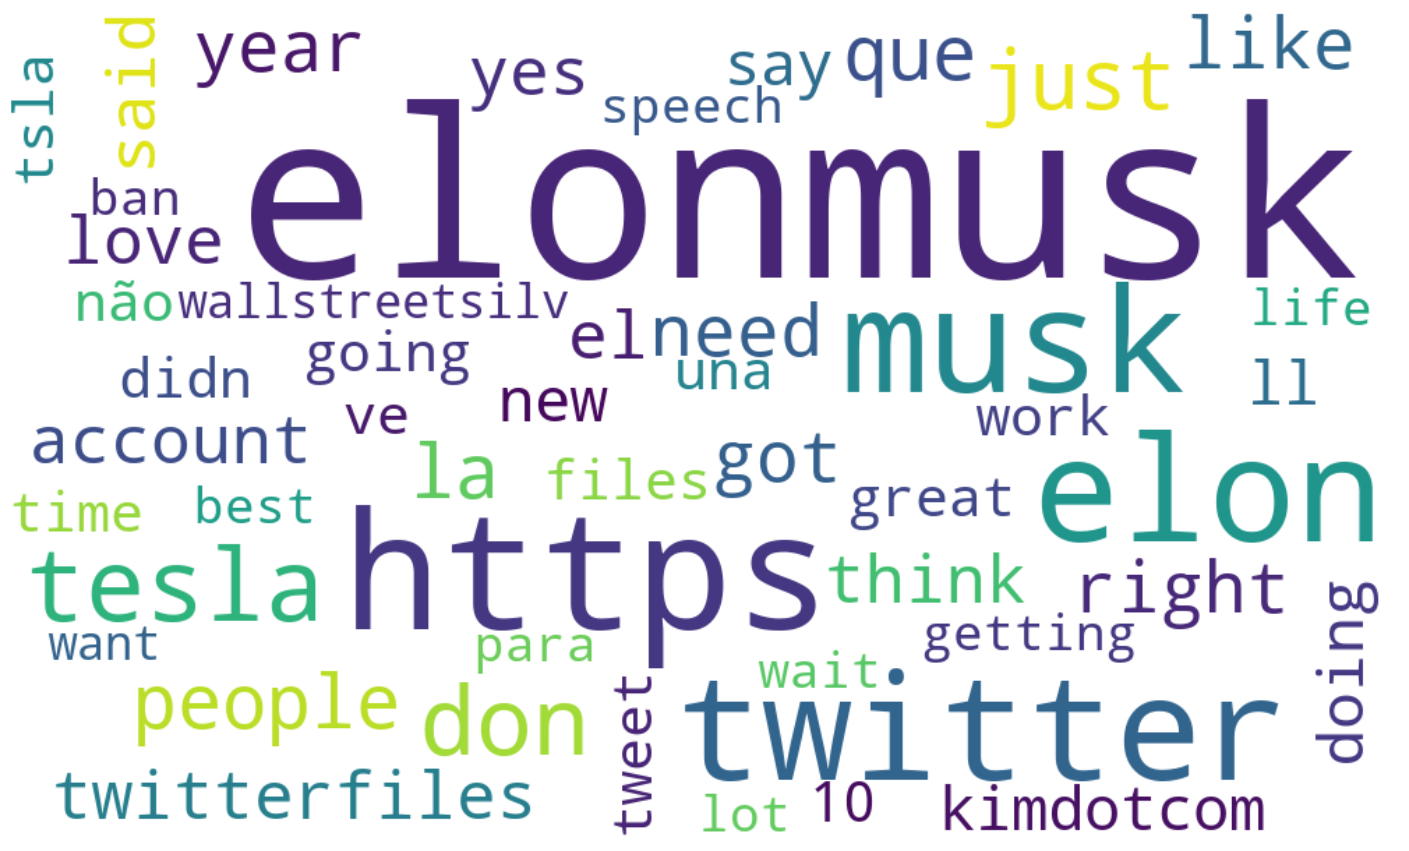

In [104]:
List_of_WC=[]

for mytopic in topics:

    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mytopic]
    print(tempdf)
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    #print(tempdf)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))
    #print( NextVarName)
    
    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    #next_image=str(str(mytopic) + ".jpg")
    #print(next_image)
    
    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    
    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    

##------------------------------------------------------------------
print(List_of_WC)
##########
########## Create the wordclouds
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("Cloud_Tweet_Musk.pdf")

In [ ]:
start_date = "2022-12-01"
end_date = "2022-12-31"

companies = ["Elon Musk","Jeff"]
tweet_count = 5

for company in companies:
    tweets_df_updated = get_tweets(start_date, end_date, company, tweet_count)
    
tweets_df_updated